
# Project: Investigate a Dataset - [No-Show Medical Appointments]

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#descrip">Dataset Description</a></li>
 <li><a href="#initexp">Initial Exploration</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#augment">Augmenting the Dataset</a></li>
    <li><a href="#monov">Monovariate Analysis</a></li>
           <li><a href="#fullexp">Exploring the full dataset</a></li>
           <li><a href="#patexp">Exploring the patient dataset</a></li>
<li><a href="#ques">Questions for Analysis</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
      <li><a href="#q1">Question 1</a></li>
    <li><a href="#q2">Question 2</a></li>
      <li><a href="#q3">Question 3</a></li>
      <li><a href="#q4">Question 4</a></li>
      <li><a href="#q5">Question 5</a></li>
      <li><a href="#q6">Question 6</a></li>
      <li><a href="#q7">Question 7</a></li>
<li><a href="#conc">Conclusions and Limitations</a></li>
</ul>

<a id='intro'></a>
# Introduction
<a id='descrip'></a>
## Dataset Description 

This is a dataset containing data in a single file for over 110,000 medical appointments in Brazil, where the objective is to investigate the most important factors in predicting whether a patient will show up for their scheduled appointment. The original source of the dataset can be found [here](https://www.kaggle.com/joniarroba/noshowappointments)

Column names:

1) PatientId - A unique identifier for the patient

2) AppointmentID - A unique identifier for the appointment made, as hypothetically a certain patient can book more than one appointment.

3) Gender - Gender of the patient (Male 'M' or Female 'F')

4) ScheduledDay - The date and time the patient called in to set an appointment

5) AppointmentDay - The date and time the appointment is due

6) Age - Patient's age

7) Neighborhood - The location of the hospital

8) Scholarship - Binary indicator: Whether or not the patient is enrolled in the Brazilian social welfare program Bolsa Família

9) Hipertension (misspelled for Hypertension)- Whether or not the patient suffers from Hypertension

10) Diabetes - Binary indicator: Whether or not the patient is diabetic

11) Alcoholism - Binary indicator: Whether or not the patient suffers from alcoholism

12) Handcap (misspelled for Handicap): Binary indicator: Whether or not the patient is handicapped

13) SMS_received - The number of SMS reminders the patient received before the appointment

14) No-show - Binary indicator: (Yes) if patient did NOT show up, and (No) if the patient SHOWED UP.


Columns numbered 1-13 are features or indepdenent variables, while column 14 is the target or dependent variable.


<a id='initexp'></a>
# Initial Exploration

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (10, 5) #sets the size for all figures following this statement

In [2]:
# import file
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Count Null Entries

In [4]:
df.isnull().sum().max()

0

Count duplicate entries based on both patient and appointment ID


In [5]:
df.duplicated(subset=['PatientId','AppointmentID']).sum()

0

In [6]:
df['Handcap'].value_counts() 

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

**Since handcap should be boolean, it is likely that the column labels of 'Handcap' and 'SMS_received' were flipped**

In [7]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

We should drop the row where age is -1 as it is invalid

<a id='clean'></a>
# Cleaning

* Correct misspelled column labels, shorten column labels where possible, and turn into snake case (i.e. lower case, separating words with underscore)

* Flip the labels of 'SMS_received' and 'Handicapped' columns

* Turn ScheduledDay into date/time format

* Turn AppointmentDay into date/time format

* Delete the row where 'Age' is invalid (-1)

* To avoid confusion in the meaning of 'Yes' and 'No' in the No-show column, rename the No-show column to 'show', and change every 'Yes' to 0='No' and every 'No' to 1='Yes'

* PatientId : float --> int

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Correct misspelled column labels

In [9]:
new_cols={'PatientId':'patient',
          'AppointmentID':'appt',
          'Gender':'sex',
          'ScheduledDay':'scd_datetime',
          'AppointmentDay': 'appt_datetime',
          'Age':'age',
          'Neighbourhood':'area',
          'Scholarship':'bolsa',
          'Hipertension':'hypert',
          'Diabetes':'diabetic',
          'Alcoholism': 'alcoholic',
          'Handcap':'handicap',
          'SMS_received':'sms',
          'No-show':'no_show'
}
df.rename(columns=new_cols,inplace=True)
df.head(1)

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,handicap,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Flip the labels of 'sms' and 'handicap' columns

In [10]:
df.rename(columns={'sms':'handicap',
                  'handicap':'sms'}
          ,inplace=True)
df.head(1)

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# Check that sms has values 0-4 and handicap has values 0-1
df.sms.value_counts(),df.handicap.value_counts()

(0    108286
 1      2042
 2       183
 3        13
 4         3
 Name: sms, dtype: int64,
 0    75045
 1    35482
 Name: handicap, dtype: int64)

###  Turn ScheduledDay into date/time format

In [12]:
df['scd_datetime']=df['scd_datetime'].apply(lambda x:x.replace('T',' ').split('Z')[0])
df['scd_datetime']=pd.to_datetime(df['scd_datetime'],infer_datetime_format=True)
# Check
print(type(df['scd_datetime'][0]))
df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Turn AppointmentDay into date/time format

In [13]:
df['appt_datetime']=df['appt_datetime'].apply(lambda x:x.replace('T',' ').split('Z')[0])
df['appt_datetime']=pd.to_datetime(df['appt_datetime'],infer_datetime_format=True)
# Check
print(type(df['appt_datetime'][0]))
df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Delete the row where 'Age' is invalid (-1)

In [14]:
idx=df[df.age==-1].index
idx

Int64Index([99832], dtype='int64')

In [15]:
df.drop(labels=idx,axis=0,inplace=True,)
#Check
df[df.age==-1]

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,no_show


### Adjust the No-show column 
To avoid confusion in the meaning of 'Yes' and 'No' in the No-show column, rename the No-show column to 'show', and change every 'Yes' to 0='No' and every 'No' to 1='Yes'

In [16]:
# First, count the number of Yes and No entries before switching
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [17]:
df.rename(columns={'no_show':'show'}
          ,inplace=True)
df['show'].replace({'Yes':0,'No':1},inplace=True)
df.head(1)

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [18]:
df.show.value_counts()


1    88207
0    22319
Name: show, dtype: int64

### PatientId : float --> int

In [19]:
# casting to int64, because simply stating 'int' defaults to int32 which reverses the sign of the patient ID
df.patient=df.patient.astype(np.int64) 
type(df.patient[0])

numpy.int64

In [20]:
df.head()

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [21]:
# Check all datatypes are appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   patient        110526 non-null  int64         
 1   appt           110526 non-null  int64         
 2   sex            110526 non-null  object        
 3   scd_datetime   110526 non-null  datetime64[ns]
 4   appt_datetime  110526 non-null  datetime64[ns]
 5   age            110526 non-null  int64         
 6   area           110526 non-null  object        
 7   bolsa          110526 non-null  int64         
 8   hypert         110526 non-null  int64         
 9   diabetic       110526 non-null  int64         
 10  alcoholic      110526 non-null  int64         
 11  sms            110526 non-null  int64         
 12  handicap       110526 non-null  int64         
 13  show           110526 non-null  int64         
dtypes: datetime64[ns](2), int64(10), object(2)
memory us

In [22]:
# Save the cleaned dataset to HDF5 file instead of CSV in order to preserve the date-time datatypes

df.to_hdf('full_db_cleaned.h5',key='df',index=False)

<a id='augment'></a>
# Augmenting the Dataset

The current dataframe *df* contains duplicated patient IDs as some patients have made more than one appointment in the period being considered:

In [23]:
df.patient.duplicated().sum()

48228

It may be useful to create another dataframe where each row is unique to a patient and add columns indicating:

1- The number of appointments made by each patient 

2- The number of times they showed up

3- Each patient's attendance rate (this helps us normalize by the number of appointments per patient)

In [24]:
patient_data_cols=np.r_[0,2,5,7:11,12,13]
df_patient_1=df.iloc[:,patient_data_cols]
df_patient_1

,patient,sex,age,bolsa,hypert,diabetic,alcoholic,handicap,show
0,29872499824296,F,62,0,1,0,0,0,1
1,558997776694438,M,56,0,0,0,0,0,1
2,4262962299951,F,62,0,0,0,0,0,1
3,867951213174,F,8,0,0,0,0,0,1
4,8841186448183,F,56,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
110522,2572134369293,F,56,0,0,0,0,1,1
110523,3596266328735,F,51,0,0,0,0,1,1
110524,15576631729893,F,21,0,0,0,0,1,1
110525,92134931435557,F,38,0,0,0,0,1,1


In [25]:
df_patient_2=pd.DataFrame(df_patient_1.pivot_table(columns=['patient'], aggfunc='size'))
df_patient_2.rename(columns={0:'num_appts'},inplace=True)
df_patient_2

,num_appts
patient,
39217,1
43741,1
93779,1
141724,1
537615,1
...,...
999931985292928,5
999934989273974,1
999946536742891,1


In [26]:
df_patient_3=pd.DataFrame(df.groupby('patient')['show'].sum())
df_patient_3.rename(columns={'show':'num_shows'},inplace=True)
df_patient_3

,num_shows
patient,
39217,1
43741,1
93779,1
141724,1
537615,1
...,...
999931985292928,5
999934989273974,1
999946536742891,1


In [27]:
df_patient_23=pd.merge(df_patient_2,df_patient_3,left_on='patient',right_on='patient',how='inner')
df_patient_23

,num_appts,num_shows
patient,,
39217,1,1
43741,1,1
93779,1,1
141724,1,1
537615,1,1
...,...,...
999931985292928,5,5
999934989273974,1,1
999946536742891,1,1


In [28]:
df_patient=pd.merge(df_patient_23,df_patient_1,left_on='patient',right_on='patient',how='inner')
df_patient.drop_duplicates(subset='patient', inplace=True)
df_patient

,patient,num_appts,num_shows,sex,age,bolsa,hypert,diabetic,alcoholic,handicap,show
0,39217,1,1,F,44,0,0,0,0,0,1
1,43741,1,1,M,39,0,0,1,0,0,1
2,93779,1,1,F,33,0,0,0,0,0,1
3,141724,1,1,M,12,0,0,0,0,0,1
4,537615,1,1,F,14,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
110517,999931985292928,5,5,M,90,0,0,0,0,0,1
110522,999934989273974,1,1,M,5,0,0,0,0,0,1
110523,999946536742891,1,1,M,65,1,1,0,0,0,1
110524,999968578354866,1,1,F,81,0,0,0,0,0,1


In [29]:
df_patient['num_diseases']=df_patient.hypert+df_patient.diabetic+df_patient.alcoholic+df_patient.handicap
df_patient

,patient,num_appts,num_shows,sex,age,bolsa,hypert,diabetic,alcoholic,handicap,show,num_diseases
0,39217,1,1,F,44,0,0,0,0,0,1,0
1,43741,1,1,M,39,0,0,1,0,0,1,1
2,93779,1,1,F,33,0,0,0,0,0,1,0
3,141724,1,1,M,12,0,0,0,0,0,1,0
4,537615,1,1,F,14,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110517,999931985292928,5,5,M,90,0,0,0,0,0,1,0
110522,999934989273974,1,1,M,5,0,0,0,0,0,1,0
110523,999946536742891,1,1,M,65,1,1,0,0,0,1,1
110524,999968578354866,1,1,F,81,0,0,0,0,0,1,0


In [30]:
df_patient['att_rate']=df_patient['num_shows']/df_patient['num_appts']
df_patient['att_rate'].describe()

count    62298.000000
mean         0.803567
std          0.351421
min          0.000000
25%          0.666667
50%          1.000000
75%          1.000000
max          1.000000
Name: att_rate, dtype: float64

In [31]:
df_patient.duplicated().sum()

0

In [32]:
# Save the cleaned patient dataset to HDF5 file

df_patient.to_hdf('patient_db_cleaned.h5',key='df_patient',index=False)

<a id='monov'></a>
## Monovariate Analysis

<a id='fullexp'></a>
### Exploring the full dataset

In [33]:
df.describe()

,patient,appt,age,bolsa,hypert,diabetic,alcoholic,sms,handicap,show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [34]:
df_patient.describe()

,patient,num_appts,num_shows,age,bolsa,hypert,diabetic,alcoholic,handicap,show,num_diseases,att_rate
count,6.229800e+04,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000
mean,1.471660e+14,1.774150,1.415888,36.705496,0.092908,0.196507,0.070885,0.024174,0.327362,0.804279,0.618928,0.803567
std,2.549080e+14,1.770336,1.623492,23.531076,0.290306,0.397360,0.256635,0.153591,0.469254,0.396758,0.747119,0.351421
min,3.921700e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176935e+12,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.666667
50%,3.198294e+13,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,9.484763e+13,2.000000,2.000000,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,9.999816e+14,88.000000,87.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [35]:
df.iloc[:,2:].head()

,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


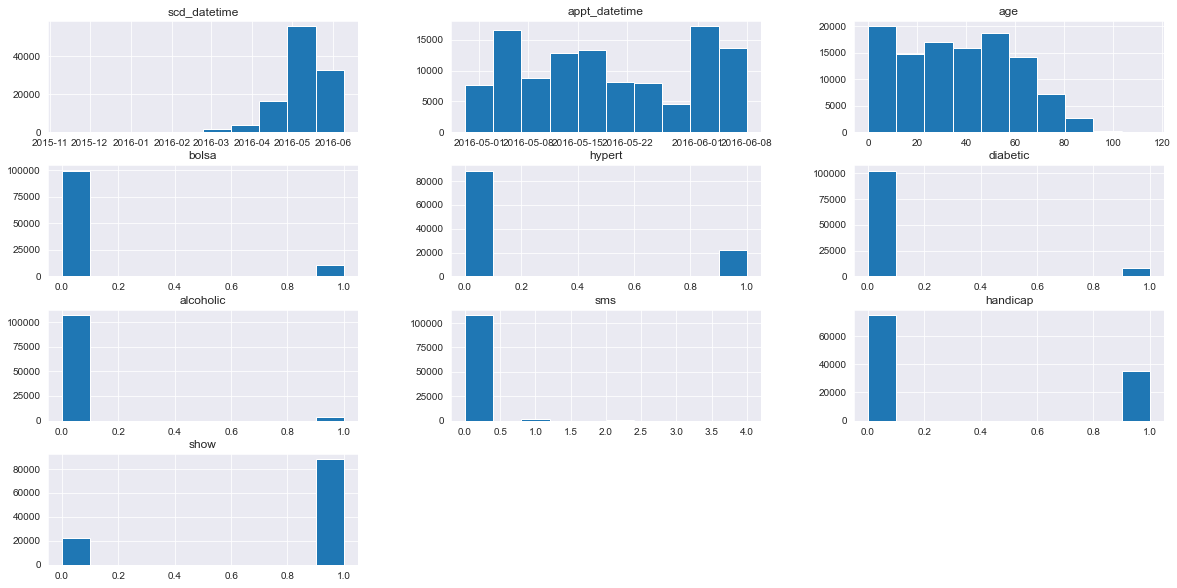

In [36]:
# Plotting the histograms for all the variables in the full dataset excluding the patient and appointment IDs

df.iloc[:,2:].hist(figsize=(20,10));

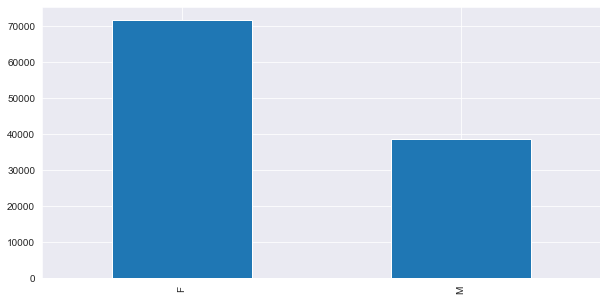

In [37]:
df.sex.value_counts().plot(kind='bar');

The schedule dates distribution is skewed to the left, showing that most appointment requests were made between April and June 2016. This may be indicative of seasonal illness such as the common flu, and such knowledge could be used to better allocate medical resources during those months of the year.It would also be interesting to superimpose the schedule date and appointment date distributions on top of one another.

We also see that most appointments were made by people free from at least one of hypertension, diabeters, alcoholism, or a disability. It makes us wonder whether a patient who has a chronic illness or disability is more keen not to miss the doctor's appointment than a person who does not.

Also, most appointments were made by people not enrolled in the social welfare program, and most appointment-goers are female.

The SMS histogram shows that predominantly, no SMS reminders were sent prior to each appointment's due date. It would be interesting to explore whether the number of SMS reminders sent has any bearing on attendance rates.

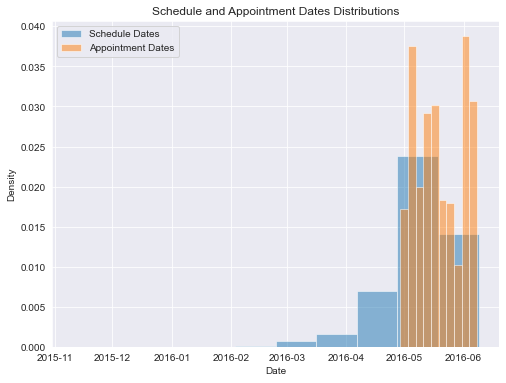

In [38]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(df.scd_datetime,density=True,label='Schedule Dates',alpha=0.5)
ax.hist(df.appt_datetime,density=True,label='Appointment Dates',alpha=0.5)
ax.legend()
ax.set_title('Schedule and Appointment Dates Distributions')
ax.set_xlabel('Date')
ax.set_ylabel('Density');

This is interesting: Almost all of the appointment dates are due over the period May-June 2016, and hardly any appointments were given in the six-month window preceding May 2016. This does not have to be unreasonable as hospitals and clinics have probably been seeing patients in the period 11-2015 to 05-2015 but for appointments scheduled prior to the data collection. This means that some patients might have had to wait for 2-6 months for the nearest appointment. It will be insightful to see how long on average a new patient would have to wait for the nearest available appointment.

<a id='patexp'></a>
### Exploring the patient dataset

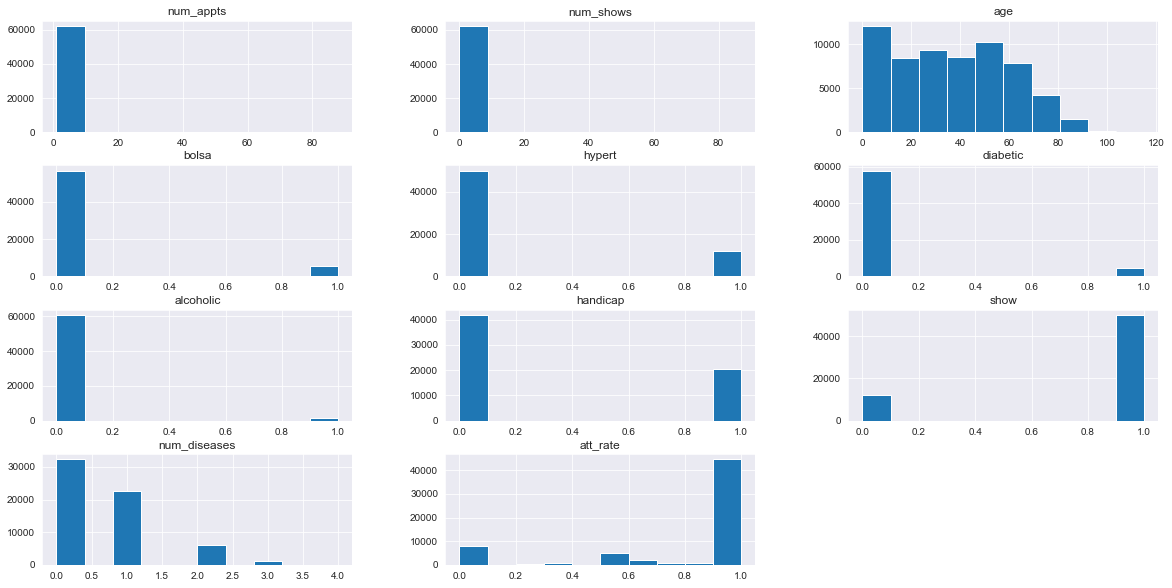

In [39]:
# Plotting the histograms for all the variables in the patient dataset excluding the patient IDs
df_patient.iloc[:,1:].hist(figsize=(20,10));

The number of shows is about the same as the number of appointments for most patients, resulting in the most predominant attendance rate being 90-100%. We are more interested in the characteristics of patients with low attendance rates. We will later section this dataframe by attendance rate and concentrate on patients with attendance rates less than 50%.

In each of the histograms for hypertension, diabetes, alcoholism, and handicap, the number of people who are free from the illness is much higher than those who aren't. However, the histogram of the number of diseases shows that the number of people who suffer from at least one of these is almost equal to those who suffer from none. This is an insight that could not be gleaned by looking at each of the illness variables independently. It inspires the question of whether the attendance rate is correlated with the number of chronic diseases.

<a id='ques'></a>
# Question(s) for Analysis

Based on the initial exploration above:

**Q1: Is a patient's attendance rate correlated positively with their number of chronic illnesses?**

**Q2: Would sending more SMS reminders help improve the attendance rate?**

**Q3: Do appointments made and scheduled on the same day (likely indicating an urgent medical situation) lead to greater chances of showing up compared to appointments made one or more days earlier?**

**Q4: How long would a new patient have to wait on average for the next available appointment?**

**Q5: What are the characteristics of patients with attendance rates less than 50%?**

Other questions we could ask about the data:

**Q6: Are certain age groups more likely than others to miss their appointments?**

**Q7: Is the hospital location of any importance in predicting the possibility of a no-show?**

<a id='eda'></a>
# Exploratory Data Analysis

<a id='q1'></a>
## Q1: Relationship between number of chronic illnesses and attendance rate

In [40]:
df_patient.groupby('num_diseases')['att_rate'].mean()

num_diseases
0    0.829043
1    0.763590
2    0.815516
3    0.811922
4    0.773467
Name: att_rate, dtype: float64

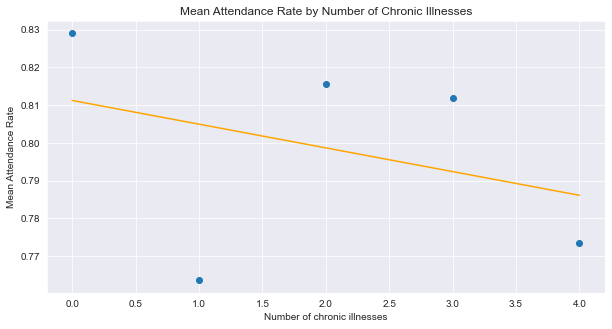

In [41]:
y=df_patient.groupby('num_diseases')['att_rate'].mean()
x=y.index

plt.scatter(x,y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color='orange');
plt.xlabel('Number of chronic illnesses')
plt.ylabel('Mean Attendance Rate');
plt.title('Mean Attendance Rate by Number of Chronic Illnesses');

This is a surprising and counter-intuitive result. It seems that patients with more chronic illnesses are more likely to miss their appointments.

<a id='q2'></a>
## Q2: Relationship between number of SMS reminders and attendance rate

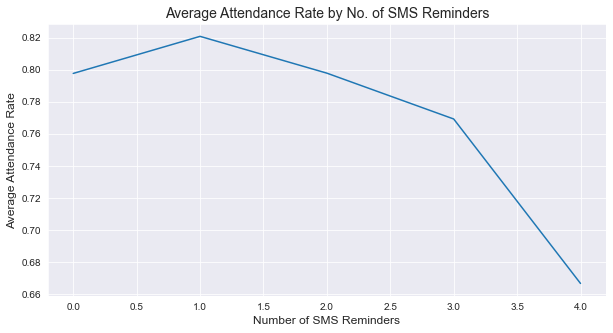

In [42]:
df.groupby('sms')['show'].mean().plot(kind='line');
plt.title('Average Attendance Rate by No. of SMS Reminders',fontsize=14)
plt.xlabel('Number of SMS Reminders',fontsize=12)
plt.ylabel('Average Attendance Rate',fontsize=12);

In [43]:
df.corr()['sms']['show']

0.006076846582439198

From the line plot above, it seems that increasing the number of SMS reminders will not necessarily improve attendance. Sending one SMS reminder might have bumped up the average attendance rate by a mere 2%, and sending more than one SMS seems to have had a negative effect, which may be coincidental. 

<a id='q3'></a>
## Q3: Relationship between attendance rate and number of days an appointment is booked in advance

In [44]:
# Create a new column for the difference between the scheduling date and the appointment date

df['days_diff']=(df['appt_datetime'].dt.date-df['scd_datetime'].dt.date).dt.days

In [45]:
# check for any negative date difference

df.days_diff.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_diff, dtype: float64

In [46]:
# Inspect problematic rows where the appointment date precedes the schedule date
idx=df[df.days_diff < 0].index

In [47]:
# delete problematic rows
df=df.drop(labels=idx,axis=0)

In [48]:
# Check that the minimum number of days difference is 0
df.days_diff.min()

0

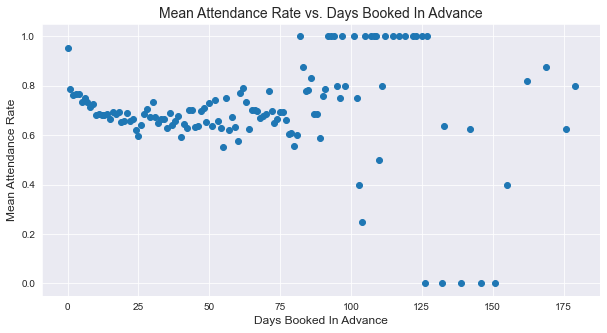

In [49]:

y=df.groupby('days_diff').mean()['show']
x=y.index

plt.scatter(x,y);

plt.xlabel('Days Booked In Advance',fontsize=12)
plt.ylabel('Mean Attendance Rate',fontsize=12)
plt.title('Mean Attendance Rate vs. Days Booked In Advance',fontsize=14);

The complexity of the figure above requires sectioning the plot into two more plots for appointments made fewer than 40 days in advance, and those made at least 40 days in advance:

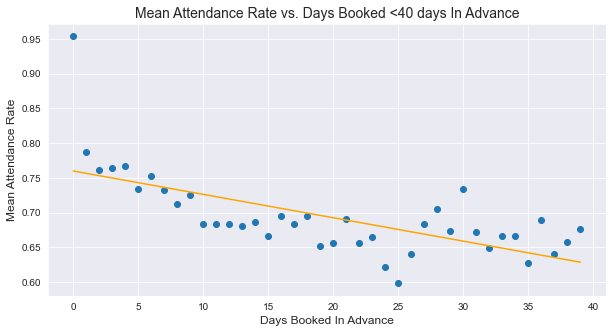

In [50]:
mask_l40=df.days_diff<40

mask_ge40=df.days_diff>=40

y= df[mask_l40].groupby('days_diff').mean()['show']
x=y.index

plt.scatter(x,y);

m,b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b,color='orange')

plt.xlabel('Days Booked In Advance',fontsize=12)
plt.ylabel('Mean Attendance Rate',fontsize=12)
plt.title('Mean Attendance Rate vs. Days Booked <40 days In Advance',fontsize=14);

For appointments made 40 or fewer days in advance, appointments due on the same day they're made scheduled the highest attendance rate. Thereafter, people tend to miss their appointments the earlier they book it in advance.

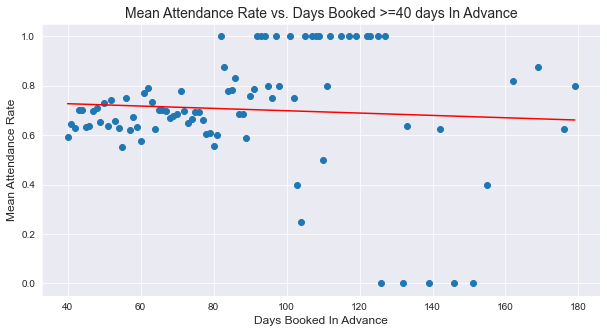

In [51]:
y= df[mask_ge40].groupby('days_diff').mean()['show']

x=y.index

plt.scatter(x,y);

m,b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b,color='red')

plt.xlabel('Days Booked In Advance',fontsize=12)
plt.ylabel('Mean Attendance Rate',fontsize=12)
plt.title('Mean Attendance Rate vs. Days Booked >=40 days In Advance',fontsize=14);

The line plot above for appointments made at least 40 days in advance does not show a clear pattern. We may need to inspect the correlation coefficient:

In [52]:
df[mask_l40].corr()['show']['days_diff']


-0.22910569083203663

In [53]:
df[mask_ge40].corr()['show']['days_diff']

0.04051146876258101

The coefficients of correlation reveal that the attendance rate is correlated negatively - although weakly- with the number of days an appointment is booked in advance, if the appointment is booked fewer than 40 days in advance. However, if an appointment is booked 40 days or more in advance, it is difficult to predict whether or not the patient will show-up based on this information alone.

<a id='q4'></a>
## Q4: The average waiting time for the nearest appointment

In [54]:
df.days_diff.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_diff, dtype: float64

<AxesSubplot:>

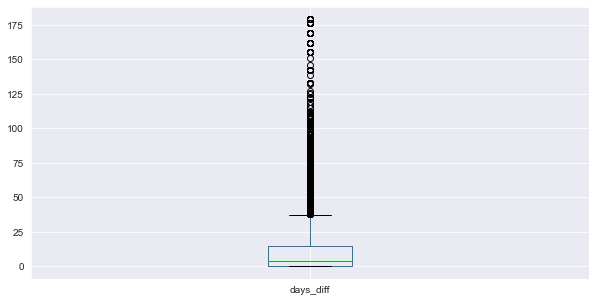

In [55]:
df.boxplot(column=['days_diff'])

The boxplot above for days waited to the next available appointment shows plenty of outliers. The median is probably a better representative of central tendency than the mean in this case.
One could say that, on average, a new patient would wait 4 days till the next available appointment.

<a id='q5'></a>
## Q5: Characteristics of the patients with attendance rates < 50%

In [56]:
lowatt=df_patient[df_patient.att_rate<0.5]
lowatt

,patient,num_appts,num_shows,sex,age,bolsa,hypert,diabetic,alcoholic,handicap,show,num_diseases,att_rate
5,5628261,1,0,M,13,0,0,0,0,0,0,0,0.000000
24,122451254,2,0,M,28,0,0,0,0,0,0,0,0.000000
33,179874775,1,0,F,16,0,0,0,0,0,0,0,0.000000
39,215778678,1,0,M,29,0,0,0,0,1,0,1,0.000000
57,342478778,1,0,M,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110455,998231581612122,3,1,F,81,0,0,0,0,0,0,0,0.333333
110458,998263455196785,1,0,F,22,1,0,0,0,0,0,0,0.000000
110467,998695728115913,3,1,F,49,1,1,0,1,0,0,2,0.333333
110497,999479168794227,3,1,M,44,0,0,0,0,1,0,1,0.333333


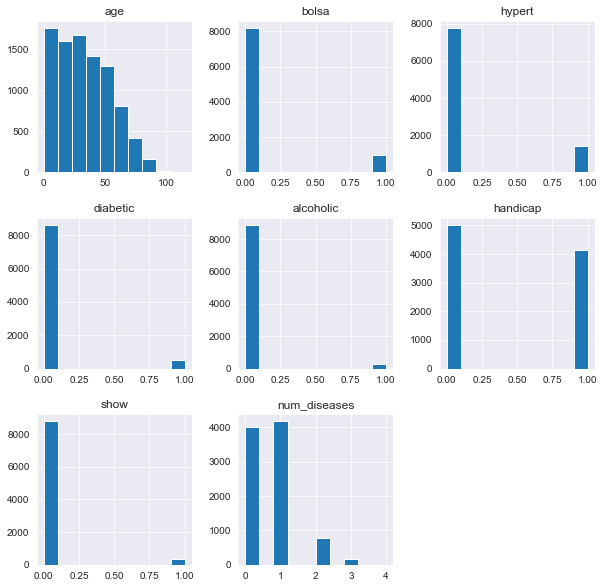

In [57]:
lowatt.iloc[:,3:12].hist(figsize=(10,10));

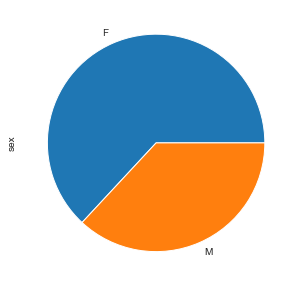

In [58]:
lowatt.sex.value_counts().plot(kind='pie');

The histogram matrix (and bar chart of the gender) for the characteristics of patients with lower attendance rates shows that those patients likely :
* Have one or no chronic illnesses
* If they have a chronic illness, it is probably a disability (handicapped)
* Are female

Are the predictor variables for these patients correlated ? To investigate, we use seaborn's pair plot and inspect off-diagonal scatter plots

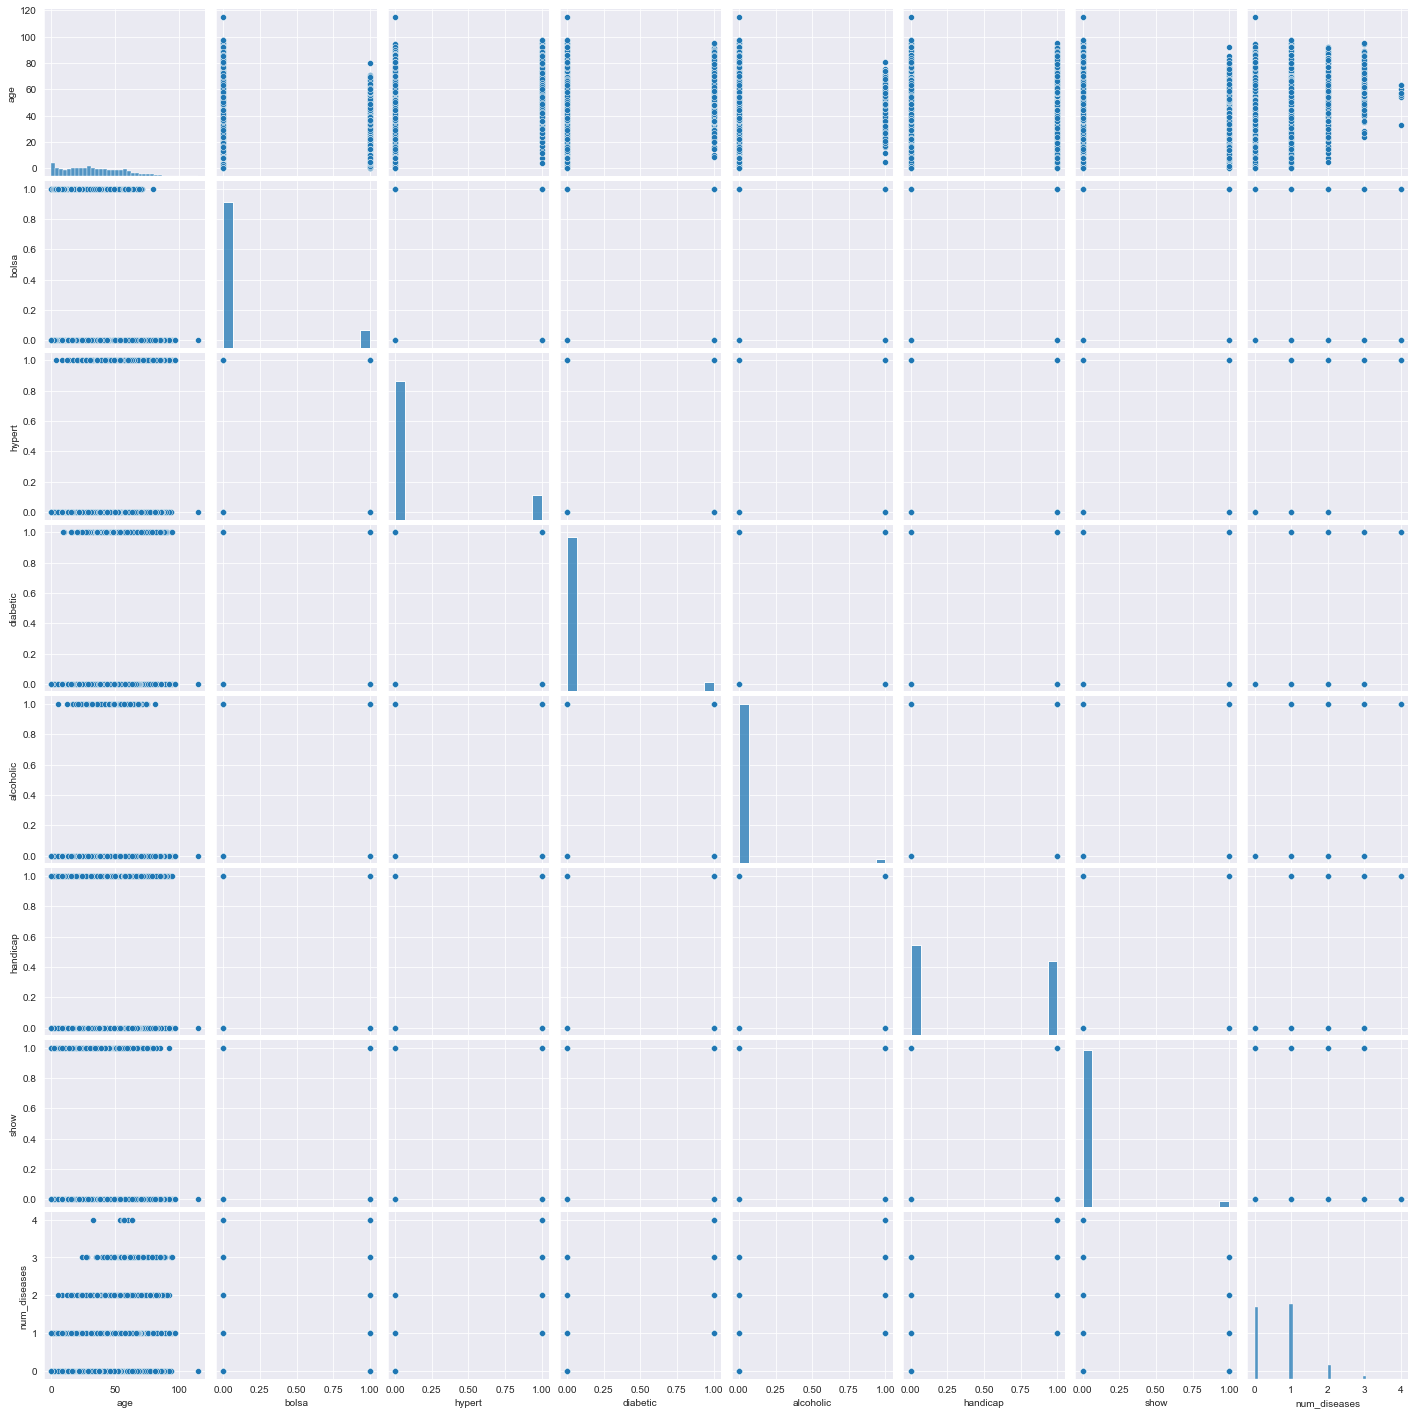

In [59]:
sns.pairplot(lowatt.iloc[:,3:12]);

The only interesting relationship in this pairplot is that between age and the number of diseases, suspected to be a positive correlation. 

In [60]:
lowatt.corr()['age']['num_diseases']

0.35357488367426537

This positive correlation between illness and age is expected of any human population. But is it sufficient to conclude that seniors are the likeliest to miss their appointments due to not only old age, but also the higher number of illnesses that accompany old age?

2.1634296333138136e-05


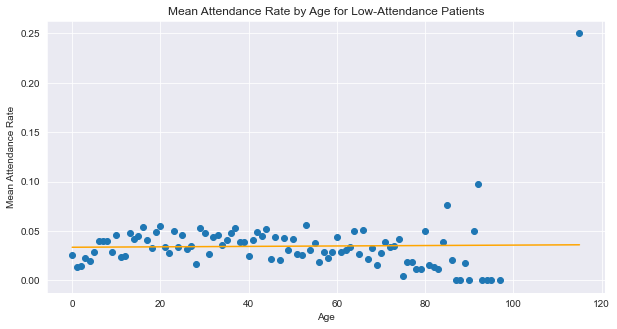

In [61]:
y=lowatt.groupby('age')['att_rate'].mean()
x=y.index
plt.scatter(x,y)

m, b = np.polyfit(x, y, 1)
print(m)

plt.plot(x, m*x + b,color='orange');

plt.xlabel('Age')

plt.ylabel('Mean Attendance Rate');

plt.title('Mean Attendance Rate by Age for Low-Attendance Patients');

The above plot is skewed by the outlier on the top right. Let's remove the outlier from the datasets and replot the same figure:

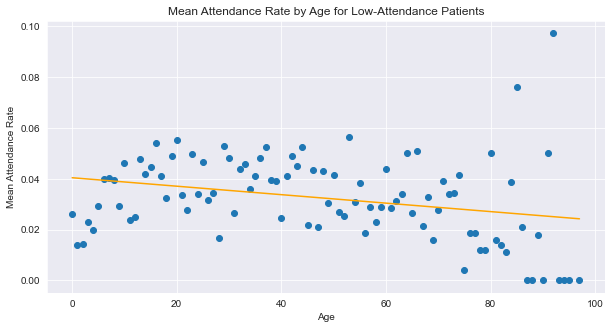

In [62]:
idx=lowatt.query('age>100').index

lowatt=lowatt.drop(index=idx)

y=lowatt.groupby('age')['att_rate'].mean()

x=y.index

plt.scatter(x,y)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color='orange');

plt.xlabel('Age')

plt.ylabel('Mean Attendance Rate');

plt.title('Mean Attendance Rate by Age for Low-Attendance Patients');

In [63]:
lowatt.corr()['age']['att_rate']

-0.004527516981967857

After removing the outlier, the regression line now slopes down, indicating a negative correlation between age and the attendance rate, even for patients with low attendance. Upon inspecting the correlation coefficient, however, we see that this relationship is too weak to conclude that seniors are the likeliest to miss their appointments.
It would be interesting to ask the same question to the larger dataset.

<a id='q6'></a>
## Q6: Are certain age groups more likely than others to miss their appointments?

First, let's define the bounds of age groups. I used [this article](https://www.researchgate.net/publication/228404297_Classification_of_Age_Groups_Based_on_Facial_Features) as a reference.

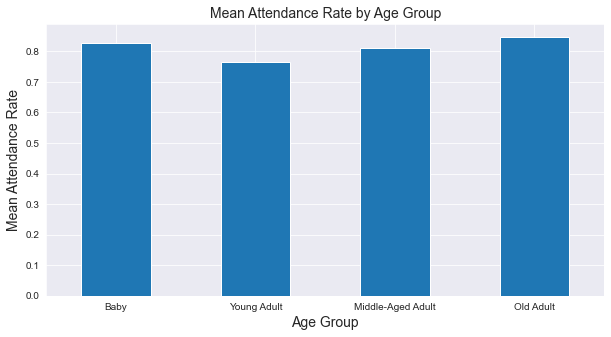

In [64]:
# Remove age outliers

idx=df.query('age>100').index

df=df.drop(index=idx)


# First, define age groups 
bin_edges=[0,2,39,59,115]
bin_names=['Baby','Young Adult','Middle-Aged Adult','Old Adult']

# Creates feature_levels column

df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Find the mean target value of each feature level with groupby

df.groupby('age_group').mean()['show'].plot(kind='bar');
plt.xticks(rotation='0')
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Mean Attendance Rate',fontsize=14)
plt.title('Mean Attendance Rate by Age Group',fontsize=14);

In [65]:
df.groupby('age_group').mean()['show'].idxmax()

'Old Adult'

In [66]:
df.groupby('age_group').mean()['show'].idxmin()

'Young Adult'

In stark contrast to our previous analysis on the low-attendance dataset, it seems that old adults (i.e. seniors) are in general the likelist to show up for their appointments, followed by babies (who must be accompanied by their parents), middle-aged adults come in the third place, while **young adults are the likeliest to miss their appointments!!**

<a id='q7'></a>
## Q7: Is the hospital location of any importance in predicting the possibility of a no-show?

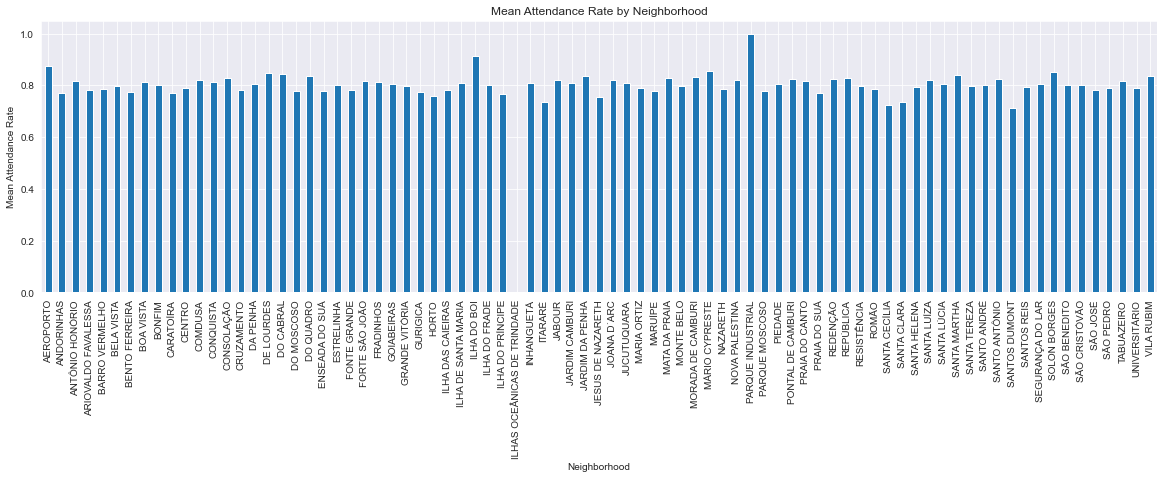

In [67]:
df.groupby('area')['show'].mean().plot(kind='bar',figsize=(20,5));
plt.xlabel('Neighborhood')
plt.ylabel('Mean Attendance Rate')
plt.title('Mean Attendance Rate by Neighborhood');

The figure above demonstrates that almost all but 4 neighborhoods have a similar attendance rate around 80%. Three exceptional neighborhoods have above average attendance rates, which are:

In [68]:
df.groupby('area')['show'].mean().sort_values(ascending=False)[:3]

area
PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
Name: show, dtype: float64

Another exceptional neighborhood has 0% mean attendance rate: ILHAS OCEÂNICAS DE TRINDADE

In [69]:
df.groupby('area')['show'].mean().sort_values()

area
ILHAS OCEÂNICAS DE TRINDADE    0.000000
SANTOS DUMONT                  0.710815
SANTA CECÍLIA                  0.725446
SANTA CLARA                    0.735178
ITARARÉ                        0.737336
                                 ...   
SOLON BORGES                   0.852878
MÁRIO CYPRESTE                 0.854447
AEROPORTO                      0.875000
ILHA DO BOI                    0.914286
PARQUE INDUSTRIAL              1.000000
Name: show, Length: 81, dtype: float64

Inspecting the appointments made in that neighborhood, we find only two appintments, both of which were no-shows. Two records in a datset of 110,500+ appointments means that not enough data was collected from that neighborhood to judge fairly whether it performs better or worse than others.

In [70]:
df[df.area=='ILHAS OCEÂNICAS DE TRINDADE']

,patient,appt,sex,scd_datetime,appt_datetime,age,area,bolsa,hypert,diabetic,alcoholic,sms,handicap,show,days_diff,age_group
48754,534986855114,5583947,F,2016-04-14 12:25:43,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0,29,Middle-Aged Adult
48765,7256429752481,5583948,F,2016-04-14 12:26:13,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0,29,Middle-Aged Adult


<a id='conc'></a>
# Conclusions and Limitations

**Summary of Findings and Recommendations**

April-June may be the time of seasonal illnesses. It is recommended to collect more data about the diagnosis of each patient after each appointment to identify what the seasonal illnesses are, and allocate more medical personnel and resources  to public hospitals and clinics during those times

The predominant attendance rate for patients is generally high at around 80%; the same as the mean attendance rate for the neighborhoods.

Sending one SMS reminder to patient may help to slightly improve attendance by no more than 2%

Most patients suffer from one or no chronic illnesses. Fewer suffer from more than one chronic illness.

Patients with more chronic illnesses are more likely to miss their appointments.

Appointments scheduled and due on the same day have the highest attendance rate than appointments booked in advance.

Generally, if an appointment is booked fewer than 40 days in advance, then generally: the longer the days the patient has to wait, the more likely they'll miss the appointment. The behavior of patients becomes unpredictable beyond 40 days' worth of wait time.

On average, the next available appointment is in 4 days, disregarding outliers.

Patients with lower attendance likely :

* Have 0-1 chronic illnesses
* If they have a chronic illness, it is probably a disability (handicapped)
* Are female

Old adults (i.e. seniors) are in general the likelist to show up for their appointments, while young adults are the likeliest to miss their appointments.

Insufficient data has been collected in ILHAS OCEÂNICAS DE TRINDADE to make any statement about its performance.

The three top-performing neighborhoods with regards to attendance rates are PARQUE INDUSTRIAL, ILHA DO BOI, and AEROPORTO . They are worth inspecting further to understand the factors that led to their success and how the management models they use can be applied to other low-performing neighborhoods.

Finally, note that all findings are tentative, and any observations or correlations inferred from this analysis may or may not be statistically significant.